In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

import seaborn as sns

import time

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC as skSVC
from cuml.svm import SVC as cuSVC

from sklearn.ensemble import RandomForestClassifier as skRFC
from cuml.ensemble import RandomForestClassifier as cuRFC

from sklearn.linear_model import LogisticRegression as skLogReg
from cuml.linear_model import LogisticRegression as cuLogReg


In [2]:
df = pd.read_csv('data/csgo/csgo_round_snapshots.csv')

In [3]:
def conv_winner(winner):
    if winner == 'T':
        return 0
    elif winner == 'CT':
        return 1
    

df.round_winner = df.round_winner.apply(conv_winner)
df.bomb_planted = df.bomb_planted.astype('int32')

# One hot encode 'map'
df = pd.concat((df, pd.get_dummies(df.map)), 1)
df = df.drop(columns = ['map'])

df = df.sample(frac = 1).reset_index(drop = True)

In [4]:
y = df.round_winner
X = df.drop(columns = ['round_winner'])

In [5]:
scaler = RobustScaler().fit(X)
X = pd.DataFrame(scaler.transform(X))
scaled_df = X
scaled_df['y'] = y

In [6]:
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,y
0,-0.666801,-0.714286,0.142857,0.0,-1.333333,-1.915730,-0.263699,-0.251701,-0.353383,0.030395,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,0.714302,1.285714,0.142857,0.0,0.000000,0.000000,-0.400685,-1.136054,2.932331,1.255319,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.179111,-0.285714,-0.428571,0.0,0.000000,0.000000,0.407534,0.564626,-0.037594,-0.103343,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.044287,-0.571429,0.857143,0.0,-0.573333,-0.848315,0.349315,0.078231,-0.293233,0.212766,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,0.715105,-0.857143,-0.857143,0.0,0.000000,0.000000,-1.291096,-0.795918,-0.112782,-0.279635,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,0.179022,0.285714,-0.285714,0.0,0.000000,0.000000,-1.291096,0.561224,0.875940,0.513678,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
122406,0.000179,-0.428571,-0.714286,0.0,0.000000,0.000000,0.349315,0.564626,0.943609,-0.413374,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
122407,-0.178575,-0.428571,-0.571429,0.0,0.000000,0.000000,-0.948630,0.435374,0.563910,0.012158,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
122408,0.116699,0.571429,0.428571,0.0,0.000000,0.000000,0.349315,0.496599,0.078947,-0.039514,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [72]:
n_samples = range(11, 17)
n_samples = [2 ** item for item in n_samples]

skSVC_info = []

for item in n_samples:
    sample = scaled_df.sample(item, replace = False, random_state = 42)
    
    sample_X = sample.iloc[:, :-1]
    sample_y = sample.y
    
    
    start = time.time()
    
    clf = skSVC()
    clf.fit(sample_X, sample_y)

    time_taken = time.time() - start
                
    
    skSVC_info.append(time_taken)
    
    
# C = 1, gamma = scale, kernel = rbf

In [73]:
n_samples = range(11, 17)
n_samples = [2 ** item for item in n_samples]

cuSVC_info = []

for item in n_samples:
    sample = scaled_df.sample(item, replace = False, random_state = 42)
    
    sample_X = sample.iloc[:, :-1]
    sample_y = sample.y
    
    
    start = time.time()
    
    clf = cuSVC()
    clf.fit(sample_X, sample_y)

    time_taken = time.time() - start
                
    
    cuSVC_info.append(time_taken)
    
    
# C = 1, gamma = scale, kernel = rbf

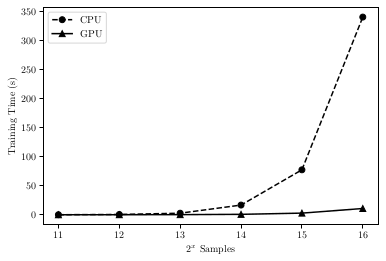

In [98]:
x_axis = list(range(11, 17))

plt.plot(x_axis, skSVC_info, label = 'CPU', linestyle = '--', marker = 'o', color = 'black')
plt.plot(x_axis, cuSVC_info, label = 'GPU', linestyle = '-', marker = '^', color = 'black')
plt.xlabel('$2^x$ Samples')
plt.ylabel('Training Time (s)')
plt.legend()
plt.savefig('raw_out/raw_svm.pgf')

In [102]:
n_samples = range(11, 17)
n_samples = [2 ** item for item in n_samples]

skRFC_info = []

for item in n_samples:
    sample = scaled_df.sample(item, replace = False, random_state = 42)
    
    sample_X = sample.iloc[:, :-1].astype('float32')
    sample_y = sample.y.astype('float32')
    
    start = time.time()
    
    clf = skRFC(max_depth = 16, n_jobs = -1)
    clf.fit(sample_X, sample_y)

    time_taken = time.time() - start
                
    
    skRFC_info.append(time_taken)
    
    
# max_depth = 16

In [103]:
n_samples = range(11, 17)
n_samples = [2 ** item for item in n_samples]

cuRFC_info = []

for item in n_samples:
    sample = scaled_df.sample(item, replace = False, random_state = 42)
    
    sample_X = sample.iloc[:, :-1].astype('float32')
    sample_y = sample.y.astype('float32')
    
    
    start = time.time()
    
    clf = cuRFC()
    clf.fit(sample_X, sample_y)

    time_taken = time.time() - start
                
    
    cuRFC_info.append(time_taken)
    
# max_depth = 16

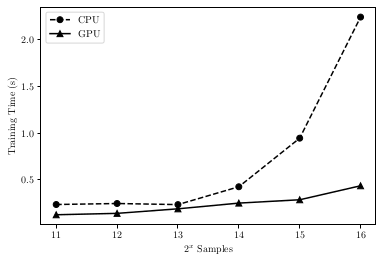

In [104]:
x_axis = list(range(11, 17))

plt.plot(x_axis, skRFC_info, label = 'CPU', linestyle = '--', marker = 'o', color = 'black')
plt.plot(x_axis, cuRFC_info, label = 'GPU', linestyle = '-', marker = '^', color = 'black')
plt.xlabel('$2^x$ Samples')
plt.ylabel('Training Time (s)')
plt.legend()
plt.savefig('raw_out/raw_rfc.pgf')

In [7]:
n_samples = range(11, 17)
n_samples = [2 ** item for item in n_samples]

skLogReg_info = []

for item in n_samples:
    sample = scaled_df.sample(item, replace = False, random_state = 42)
    
    sample_X = sample.iloc[:, :-1]
    sample_y = sample.y
    
    
    start = time.time()
    
    clf = skLogReg(max_iter = 1000)
    clf.fit(sample_X, sample_y)

    time_taken = time.time() - start
                
    
    skLogReg_info.append(time_taken)
    
    
# max_iter = 1000

In [8]:
n_samples = range(11, 17)
n_samples = [2 ** item for item in n_samples]

cuLogReg_info = []

for item in n_samples:
    sample = scaled_df.sample(item, replace = False, random_state = 42)
    
    sample_X = sample.iloc[:, :-1]
    sample_y = sample.y
    
    
    start = time.time()
    
    clf = cuLogReg()
    clf.fit(sample_X, sample_y)

    time_taken = time.time() - start
                
    
    cuLogReg_info.append(time_taken)
    
    
# max_iter = 1000

In [9]:
x_axis = list(range(11, 17))

plt.plot(x_axis, skLogReg_info, label = 'CPU', linestyle = '--', marker = 'o', color = 'black')
plt.plot(x_axis, cuLogReg_info, label = 'GPU', linestyle = '-', marker = '^', color = 'black')
plt.xlabel('$2^x$ Samples')
plt.ylabel('Training Time (s)')
plt.legend()
plt.savefig('raw_out/raw_log_reg.pgf')